# Setup 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = datasets.load_iris()
X = data["data"][:,3:]
y = (data["target"] == 2).astype(int)

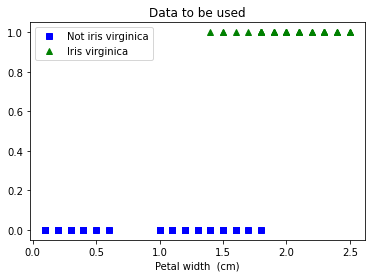

In [3]:
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.legend(["Not iris virginica","Iris virginica"])
plt.xlabel("Petal width  (cm)")
plt.title("Data to be used")
plt.show()

# Logistic regression 

Trying to find a decision boundary that seperates the two classes best. For this we are going to use the logistic (sigmoid) function to estimate probabilities.

Sigmoid function

$$
\sigma(z) = \frac{1}{1+e^{(-z)}}
$$

Loss function

$$
L(\theta) = - y^{(i)} \log(\sigma (\theta^{T}x^{(i)})) - (1 - y^{(i)}) \log (1 - (\sigma (\theta^{T}x^{(i)})))
$$

Error

$$
E = \sigma(Xw + b) - y  
$$

Partial derivatives

$$
\frac{\partial}{\partial \theta_{w}} = \frac{1}{m}X^{T}E \\
\frac{\partial}{\partial \theta_{b}} = \frac{1}{m}\sum_{i = 1}^{i = m} E \\
$$

Step function

$$
\theta_{w,b} = \theta_{w,b} - \alpha \frac{\partial}{\partial \theta_{w,b}}
$$


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) 

In [5]:
w = [1.2]
b = -5
iterations = 10000
alpha = 0.003
m = len(X)
J_hist = []

#full algorithm
for i in range(iterations):
    
    #calculate cost - just for plotting
    total_cost = 0
    for i in range(m):
        pred = sigmoid(np.dot(w, X[i])+ b)
        total_cost += (-y[i] * np.log(pred)) - (1 - y[i]) * np.log(1 - pred)
    total_cost /= m
    J_hist.append(total_cost)
    
    #get partial derivatives
    error = sigmoid(np.dot(X, w) + b) - y
    dj_dw = (1/m)*np.dot(X.T, error)
    dj_db = (1/m)*np.sum(error)
    
    # Update Parameters using w, b, alpha and gradient
    w = w - alpha * dj_dw               
    b = b - alpha * dj_db   

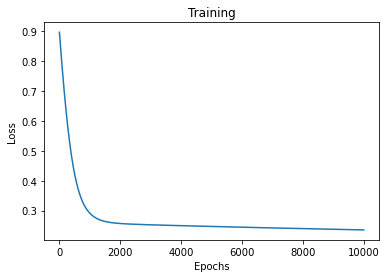

Min loss: 0.23554544405993208


In [6]:
plt.plot(J_hist)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training")
plt.show()

print(f"Min loss: {min(J_hist)}")

In [13]:
preds = []
threshold = 0.5

for i in range(len(X)):
    res = sigmoid(w[0] * X[i] + b)
    if res > threshold:
        preds.append(X[i])
        
thresh = min(preds)

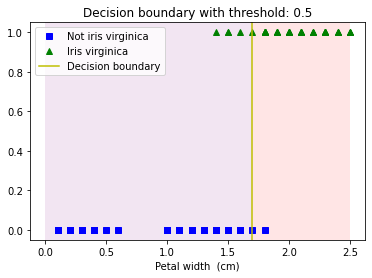

In [14]:
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.axvline(x=thresh, c = "y")
plt.axvspan(0, thresh, facecolor='purple', alpha=0.1)
plt.axvspan(thresh, max(X), facecolor='red', alpha=0.1)

plt.legend(["Not iris virginica","Iris virginica", "Decision boundary"])
plt.xlabel("Petal width  (cm)")
plt.title(f"Decision boundary with threshold: {threshold}")
plt.show()